<a href="https://colab.research.google.com/github/njocimar28/nba/blob/main/Comparativo_temporada_2022_23_Lakers_In%C3%ADcio_da_temporada_vs_Lakers_Final_da_temporada_(p%C3%B3s_trade_deadline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparativo temporada 2022/23 -  Lakers Início da temporada vs Lakers Final da temporada (pós trade deadline)**


## Conhecendo e tratando os dados

In [62]:
# importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# selecionando os dados
jogadores = pd.read_csv('https://github.com/njocimar28/nba/blob/84fe6c9d6cb5fdb3d5194e191e767927d5fd235e/jogadores_em_atividade_nba%20(1)?raw=true')

In [64]:
# tamanho dos dados
jogadores.shape

(2988, 28)

In [65]:
# analisando os dados
jogadores.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,JOGADOR
0,1630173,2020-21,0,1610612748,MIA,21.0,61,4,737.0,124,...,73,135,208,29,20,28,43,91,304,Precious Achiuwa
1,1630173,2021-22,0,1610612761,TOR,22.0,73,28,1725.0,265,...,146,327,473,82,37,41,84,151,664,Precious Achiuwa
2,1630173,2022-23,0,1610612761,TOR,23.0,55,12,1141.0,196,...,100,228,328,50,31,30,59,102,508,Precious Achiuwa
3,203500,2013-14,0,1610612760,OKC,20.0,81,20,1197.0,93,...,142,190,332,43,40,57,71,203,265,Steven Adams
4,203500,2014-15,0,1610612760,OKC,21.0,70,67,1771.0,217,...,199,324,523,66,38,86,99,222,537,Steven Adams


In [66]:
# tipos de dados
jogadores.dtypes

PLAYER_ID              int64
SEASON_ID             object
LEAGUE_ID              int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
PLAYER_AGE           float64
GP                     int64
GS                     int64
MIN                  float64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PTS                    int64
JOGADOR               object
dtype: object

In [67]:
#transformando os dados float em int
jogadores[['PLAYER_AGE', 'MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT']] = jogadores[['PLAYER_AGE', 'MIN', 'FG_PCT', 'FG3_PCT', 'FT_PCT']].astype(int)
jogadores.dtypes

PLAYER_ID             int64
SEASON_ID            object
LEAGUE_ID             int64
TEAM_ID               int64
TEAM_ABBREVIATION    object
PLAYER_AGE            int64
GP                    int64
GS                    int64
MIN                   int64
FGM                   int64
FGA                   int64
FG_PCT                int64
FG3M                  int64
FG3A                  int64
FG3_PCT               int64
FTM                   int64
FTA                   int64
FT_PCT                int64
OREB                  int64
DREB                  int64
REB                   int64
AST                   int64
STL                   int64
BLK                   int64
TOV                   int64
PF                    int64
PTS                   int64
JOGADOR              object
dtype: object

In [68]:
# verficando dados nulos
print(jogadores.isnull().sum())

print(jogadores.isna().sum())

PLAYER_ID            0
SEASON_ID            0
LEAGUE_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_AGE           0
GP                   0
GS                   0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
JOGADOR              0
dtype: int64
PLAYER_ID            0
SEASON_ID            0
LEAGUE_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
PLAYER_AGE           0
GP                   0
GS                   0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              

In [69]:
#dicionário dos termos abreviados
dicionario_nba = {'PLAYER_ID': 'ID do jogador',
                  'SEASON_ID': 'ID da temporada',
                  'LEAGUE_ID': 'ID da liga',
                  'TEAM_ID': 'ID do time',
                  'TEAM_ABBREVIATION': 'Abreviação do time',
                  'PLAYER_AGE': 'Idade do jogador',
                  'GP': 'Partidas jogadas',
                  'GS': 'Partidas iniciadas como titular',
                  'MIN': 'Minutos jogados',
                  'FGM': 'Cestas de quadra convertidas',
                  'FGA': 'Cestas de quadra tentadas',
                  'FG_PCT': 'Percentual de acerto de cestas de quadra',
                  'FG3M': 'Cestas de três pontos convertidas',
                  'FG3A': 'Cestas de três pontos tentadas',
                  'FG3_PCT': 'Percentual de acerto de cestas de três pontos',
                  'FTM': 'Lances livres convertidos',
                  'FTA': 'Lances livres tentados',
                  'FT_PCT': 'Percentual de acerto de lances livres',
                  'OREB': 'Rebotes ofensivos',
                  'DREB': 'Rebotes defensivos',
                  'REB': 'Total de rebotes',
                  'AST': 'Assistências',
                  'STL': 'Roubadas de bola',
                  'BLK': 'Tocos',
                  'TOV': 'Perdas de bola',
                  'PF': 'Faltas pessoais',
                  'PTS': 'Pontos marcados'}

In [70]:
# Criando as colunas com media por jogo
lista_de_estatisticas = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A',
                         'FTM', 'FTA', 'OREB', 'DREB',
                         'REB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PTS', 'MIN'] # Considerado apenas colunas com números absolutos e excluindo as colunas com percetual (PCT)

for i in lista_de_estatisticas:
  jogadores['MEDIA_'+ i] = (jogadores[i] / jogadores['GP']).round(2)

In [71]:
jogadores.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,MEDIA_FTA,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS
0,1630173,2020-21,0,1610612748,MIA,21,61,4,737,124,...,1.80,1.20,2.21,3.41,0.48,0.33,0.46,0.70,1.49,4.98
1,1630173,2021-22,0,1610612761,TOR,22,73,28,1725,265,...,1.79,2.00,4.48,6.48,1.12,0.51,0.56,1.15,2.07,9.10
2,1630173,2022-23,0,1610612761,TOR,23,55,12,1141,196,...,2.25,1.82,4.15,5.96,0.91,0.56,0.55,1.07,1.85,9.24
3,203500,2013-14,0,1610612760,OKC,20,81,20,1197,93,...,1.68,1.75,2.35,4.10,0.53,0.49,0.70,0.88,2.51,3.27
4,203500,2014-15,0,1610612760,OKC,21,70,67,1771,217,...,2.93,2.84,4.63,7.47,0.94,0.54,1.23,1.41,3.17,7.67


In [72]:
# Excluir as colunas não utilizadas
colunas_excluidas = ['PLAYER_ID',	'LEAGUE_ID','TEAM_ID']
jogadores = jogadores.drop(columns=colunas_excluidas)

In [73]:
jogadores.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,MEDIA_FTA,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS
0,2020-21,MIA,21,61,4,737,124,228,0,0,...,1.80,1.20,2.21,3.41,0.48,0.33,0.46,0.70,1.49,4.98
1,2021-22,TOR,22,73,28,1725,265,603,0,56,...,1.79,2.00,4.48,6.48,1.12,0.51,0.56,1.15,2.07,9.10
2,2022-23,TOR,23,55,12,1141,196,404,0,29,...,2.25,1.82,4.15,5.96,0.91,0.56,0.55,1.07,1.85,9.24
3,2013-14,OKC,20,81,20,1197,93,185,0,0,...,1.68,1.75,2.35,4.10,0.53,0.49,0.70,0.88,2.51,3.27
4,2014-15,OKC,21,70,67,1771,217,399,0,0,...,2.93,2.84,4.63,7.47,0.94,0.54,1.23,1.41,3.17,7.67


In [74]:
# Criando um dicionário com o nome dos times
times_nba = {
    'ATL': 'ATLANTA HAWKS',
    'BOS': 'BOSTON CELTICS',
    'BKN': 'BROOKLYN NETS',
    'CHA': 'CHARLOTTE HORNETS',
    'CHI': 'CHICAGO BULLS',
    'CLE': 'CLEVELAND CAVALIERS',
    'DAL': 'DALLAS MAVERICKS',
    'DEN': 'DENVER NUGGETS',
    'DET': 'DETROIT PISTONS',
    'GSW': 'GOLDEN STATE WARRIORS',
    'HOU': 'HOUSTON ROCKETS',
    'IND': 'INDIANA PACERS',
    'LAC': 'LOS ANGELES CLIPPERS',
    'LAL': 'LOS ANGELES LAKERS',
    'MEM': 'MEMPHIS GRIZZLIES',
    'MIA': 'MIAMI HEAT',
    'MIL': 'MILWAUKEE BUCKS',
    'MIN': 'MINNESOTA TIMBERWOLVES',
    'NOP': 'NEW ORLEANS PELICANS',
    'NYK': 'NEW YORK KNICKS',
    'OKC': 'OKLAHOMA CITY THUNDER',
    'ORL': 'ORLANDO MAGIC',
    'PHI': 'PHILADELPHIA 76ERS',
    'PHX': 'PHOENIX SUNS',
    'POR': 'PORTLAND TRAIL BLAZERS',
    'SAC': 'SACRAMENTO KINGS',
    'SAS': 'SAN ANTONIO SPURS',
    'TOR': 'TORONTO RAPTORS',
    'UTA': 'UTAH JAZZ',
    'WAS': 'WASHINGTON WIZARDS'
}

In [75]:
# Criando a coluna Time
jogadores['TIME'] = jogadores['TEAM_ABBREVIATION'].map(times_nba)

In [76]:
jogadores.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS,TIME
0,2020-21,MIA,21,61,4,737,124,228,0,0,...,1.20,2.21,3.41,0.48,0.33,0.46,0.70,1.49,4.98,MIAMI HEAT
1,2021-22,TOR,22,73,28,1725,265,603,0,56,...,2.00,4.48,6.48,1.12,0.51,0.56,1.15,2.07,9.10,TORONTO RAPTORS
2,2022-23,TOR,23,55,12,1141,196,404,0,29,...,1.82,4.15,5.96,0.91,0.56,0.55,1.07,1.85,9.24,TORONTO RAPTORS
3,2013-14,OKC,20,81,20,1197,93,185,0,0,...,1.75,2.35,4.10,0.53,0.49,0.70,0.88,2.51,3.27,OKLAHOMA CITY THUNDER
4,2014-15,OKC,21,70,67,1771,217,399,0,0,...,2.84,4.63,7.47,0.94,0.54,1.23,1.41,3.17,7.67,OKLAHOMA CITY THUNDER


## Criando funções para análise dos dados

### Função média de pontos por jogo

In [78]:
# Criando função para calcular a média de pontos por jogo
def calcular_media_pontos(time):
    media_pts = pd.DataFrame(time[['JOGADOR', 'MEDIA_PTS']])
    media_pts = media_pts.sort_values('MEDIA_PTS', ascending=False)
    media_pts = media_pts.reset_index(drop=True)
    media_pts['RANK'] = media_pts.index + 1
    return media_pts.head()

### Função média de assistências por jogo

In [79]:
# Criando função para calcular a média de assistências por jogo
def calcular_media_assistencias(time):
    media_ast = pd.DataFrame(time[['JOGADOR', 'MEDIA_AST']])
    media_ast = media_ast.sort_values('MEDIA_AST', ascending=False)
    media_ast = media_ast.reset_index(drop=True)
    media_ast['RANK'] = media_ast.index + 1
    return media_ast.head()

### Função média de rebotes por jogo

In [80]:
# Criando função para calcular media de rebotes por jogo
def calcular_media_rebotes(time):
    media_rebotes = pd.DataFrame(time[['JOGADOR', 'MEDIA_REB', 'MEDIA_OREB', 'MEDIA_DREB']])
    media_rebotes = media_rebotes.sort_values('MEDIA_REB', ascending=False)
    media_rebotes = media_rebotes.reset_index(drop=True)
    media_rebotes['REB_OFENSIVOS %'] = media_rebotes['MEDIA_OREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['REB_DEFENSIVOS %'] = media_rebotes['MEDIA_DREB'] / media_rebotes['MEDIA_REB']
    media_rebotes['RANK'] = media_rebotes.index + 1
    media_rebotes = media_rebotes.head().round(2)
    return media_rebotes

### Função média de lances livres por jogo

In [81]:
# Criando função para calcular media de lances livres por jogo
def calcular_media_lances_livres(time):
    media_lances_livres = pd.DataFrame(time[['JOGADOR', 'MEDIA_FTA', 'MEDIA_FTM']])
    media_lances_livres['% ACERTOS'] = media_lances_livres['MEDIA_FTM'] / media_lances_livres['MEDIA_FTA']
    media_lances_livres = media_lances_livres.sort_values('MEDIA_FTM', ascending=False)
    media_lances_livres = media_lances_livres.reset_index(drop=True)
    media_lances_livres['RANK'] = media_lances_livres.index + 1
    media_lances_livres = media_lances_livres.head().round(2)
    return media_lances_livres

### Função média de arremessos por jogo

In [82]:
# Criando função para calcular media de arremessos por jogo
def calcular_media_arremessos(time):
    media_arremessos = pd.DataFrame(time[['JOGADOR', 'MEDIA_FGA', 'MEDIA_FGM']])
    media_arremessos['% ACERTOS'] = media_arremessos['MEDIA_FGM'] / media_arremessos['MEDIA_FGA']
    media_arremessos = media_arremessos.sort_values('MEDIA_FGM', ascending=False)
    media_arremessos = media_arremessos.reset_index(drop=True)
    media_arremessos['RANK'] = media_arremessos.index + 1
    media_arremessos = media_arremessos.head().round(2)
    return media_arremessos

### Função média de arremessos de 3 pontos por jogo

In [83]:
# Criando função para calcular media de arremessos de 3 pontos por jogo
def calcular_media_arremessos_3pts(time):
    media_arremessos_3pts = pd.DataFrame(time[['JOGADOR', 'MEDIA_FG3A', 'MEDIA_FG3M']])
    media_arremessos_3pts['% ACERTOS'] = media_arremessos_3pts['MEDIA_FG3M'] / media_arremessos_3pts['MEDIA_FG3A']
    media_arremessos_3pts = media_arremessos_3pts.sort_values('MEDIA_FG3M', ascending=False)
    media_arremessos_3pts = media_arremessos_3pts.reset_index(drop=True)
    media_arremessos_3pts['RANK'] = media_arremessos_3pts.index + 1
    media_arremessos_3pts = media_arremessos_3pts.head().round(2)
    return media_arremessos_3pts

### Função quantidade de jogos na temporada

In [84]:
# Criando função para calcular a quantidade de jogos por temporada
def calcular_jogos(time):
    numero_jogos = pd.DataFrame(time[['JOGADOR', 'GP', 'GS']])
    numero_jogos['% COMO TITULAR'] = numero_jogos['GS'] / numero_jogos['GP']
    numero_jogos = numero_jogos.sort_values('GP', ascending=False)
    numero_jogos = numero_jogos.reset_index(drop=True)
    numero_jogos['RANK'] = numero_jogos.index + 1
    numero_jogos = numero_jogos.head().round(2)
    return numero_jogos

### Função quantidade de minutos por temporada

In [85]:
# Criando função para calcular a quantidade de minutos por temporada
def calcular_minutos(time):
    numero_minutos = pd.DataFrame(time[['JOGADOR', 'MEDIA_MIN']])
    numero_minutos = numero_minutos.sort_values('MEDIA_MIN', ascending=False)
    numero_minutos = numero_minutos.reset_index(drop=True)
    numero_minutos['RANK'] = numero_minutos.index + 1
    numero_minutos = numero_minutos.head().round(2)
    return numero_minutos

### Função média de roubos de bola por jogo

In [86]:
# Criando função para calcular a média de roubos de bola por jogo
def calcular_media_roubos(time):
    media_roubos = pd.DataFrame(time[['JOGADOR', 'MEDIA_STL']])
    media_roubos = media_roubos.sort_values('MEDIA_STL', ascending=False)
    media_roubos = media_roubos.reset_index(drop=True)
    media_roubos['RANK'] = media_roubos.index + 1
    return media_roubos.head()

### Função média de tocos por jogo

In [87]:
# Criando função para calcular a média de tocos por jogo
def calcular_media_tocos(time):
    media_tocos = pd.DataFrame(time[['JOGADOR', 'MEDIA_BLK']])
    media_tocos = media_tocos.sort_values('MEDIA_BLK', ascending=False)
    media_tocos = media_tocos.reset_index(drop=True)
    media_tocos['RANK'] = media_tocos.index + 1
    return media_tocos.head()

### Função média de erros de posse/perda de bola por jogo

In [88]:
# Criando função para calcular a média de perda de bola (erro de posse / turn over) por jogo
def calcular_media_perda(time):
    media_perda = pd.DataFrame(time[['JOGADOR', 'MEDIA_TOV']])
    media_perda = media_perda.sort_values('MEDIA_TOV', ascending=False)
    media_perda = media_perda.reset_index(drop=True)
    media_perda['RANK'] = media_perda.index + 1
    return media_perda.head()

### Função média de faltas cometidas por jogo

In [89]:
# Criando função para calcular a média de faltas pessoais por jogo
def calcular_media_faltas(time):
    media_faltas = pd.DataFrame(time[['JOGADOR', 'MEDIA_PF']])
    media_faltas = media_faltas.sort_values('MEDIA_PF', ascending=False)
    media_faltas = media_faltas.reset_index(drop=True)
    media_faltas['RANK'] = media_faltas.index + 1
    return media_faltas.head()

## Criando o Data Frame com os jogadores dos Lakers

In [90]:
# Filtrando os dados dos jogadores que atuaram pelos Lakers na temporada 2022/23
elenco_lakers = jogadores.query("TEAM_ABBREVIATION == 'LAL' and SEASON_ID == '2022-23'")
elenco_lakers.head()

,SEASON_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,MEDIA_OREB,MEDIA_DREB,MEDIA_REB,MEDIA_AST,MEDIA_STL,MEDIA_BLK,MEDIA_TOV,MEDIA_PF,MEDIA_PTS,TIME
115,2022-23,LAL,24,9,1,88,11,27,0,5,...,1.22,3.33,4.56,0.44,0.11,0.56,0.89,2.11,3.67,LOS ANGELES LAKERS
193,2022-23,LAL,26,26,14,621,105,268,0,66,...,0.31,3.00,3.31,1.19,0.81,0.04,1.15,1.23,11.12,LOS ANGELES LAKERS
215,2022-23,LAL,34,45,45,1211,97,241,0,55,...,0.53,2.58,3.11,2.62,0.89,0.56,0.93,2.76,6.40,LOS ANGELES LAKERS
409,2022-23,LAL,20,41,3,512,44,106,0,26,...,0.17,1.66,1.83,0.51,0.22,0.17,0.32,0.80,3.12,LOS ANGELES LAKERS
504,2022-23,LAL,30,56,54,1905,542,962,0,19,...,3.48,9.05,12.54,2.64,1.05,2.04,2.18,2.61,25.91,LOS ANGELES LAKERS


In [91]:
# Criando lista de jogadores dos Laker no início e final de temporada
lista_lakers_inicio = ["Patrick Beverley",
                      "Max Christie",
                      "Anthony Davis",
                      "Wenyen Gabriel",
                      "LeBron James",
                      "Davon Reed",
                      "Matt Ryan",
                      "Juan Toscano-Anderson",
                      "Lonnie Walker IV",
                      "Russell Westbrook"
]

lista_lakers_final = ["Mo Bamba",
                      "Malik Beasley",
                      "Max Christie",
                      "Anthony Davis",
                      "Wenyen Gabriel",
                      "LeBron James",
                      "D'Angelo Russell",
                      "Jarred Vanderbilt",
                      "Lonnie Walker IV",
                      "Rui Hachimura"
]


## Estatíticas de comparação Lakers início vs Final da temporada 20022/23

### Média de pontos por jogo

In [92]:
# Criando um rank de media pontos com o elenco do início da temporada
media_pts_lakers_inicio = calcular_media_pontos(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_pts_lakers_inicio.head()

,JOGADOR,MEDIA_PTS,RANK
0,LeBron James,28.91,1
1,Anthony Davis,25.91,2
2,Russell Westbrook,15.90,3
3,Lonnie Walker IV,11.68,4
4,Patrick Beverley,6.40,5


In [93]:
# Criando um rank de media de pontos com o elenco do final da temporada
media_pts_lakers_final = calcular_media_pontos(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_pts_lakers_final.head()

,JOGADOR,MEDIA_PTS,RANK
0,LeBron James,28.91,1
1,Anthony Davis,25.91,2
2,D'Angelo Russell,17.41,3
3,Lonnie Walker IV,11.68,4
4,Malik Beasley,11.12,5


In [94]:
# Soma das médias de pontos dos jogadores de cada lista
soma_media_pts_inicio = media_pts_lakers_inicio['MEDIA_PTS'].sum().round(2)
soma_media_pts_final = media_pts_lakers_final['MEDIA_PTS'].sum().round(2)

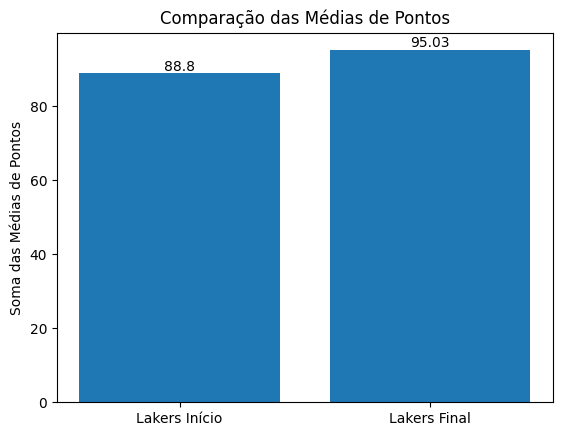

In [170]:
# Plotando a comparação da média de pontos por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_pts_inicio, soma_media_pts_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Soma das Médias de Pontos')
ax = plt.title('Comparação das Médias de Pontos')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

### Média de assistências por jogo

In [96]:
# Criando um rank de media de assistências com o elenco do início da temporada
media_ast_lakers_inicio = calcular_media_assistencias(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_ast_lakers_inicio.head()

,JOGADOR,MEDIA_AST,RANK
0,Russell Westbrook,7.52,1
1,LeBron James,6.82,2
2,Anthony Davis,2.64,3
3,Patrick Beverley,2.62,4
4,Lonnie Walker IV,1.14,5


In [97]:
# Criando um rank de media de assistências com o elenco do final da temporada
media_ast_lakers_final = calcular_media_assistencias(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_ast_lakers_final.head()

,JOGADOR,MEDIA_AST,RANK
0,LeBron James,6.82,1
1,D'Angelo Russell,6.06,2
2,Anthony Davis,2.64,3
3,Jarred Vanderbilt,1.62,4
4,Malik Beasley,1.19,5


In [98]:
# Soma das médias de assitências dos jogadores de cada lista
soma_media_ast_inicio = media_ast_lakers_inicio['MEDIA_AST'].sum().round(2)
soma_media_ast_final = media_ast_lakers_final['MEDIA_AST'].sum().round(2)

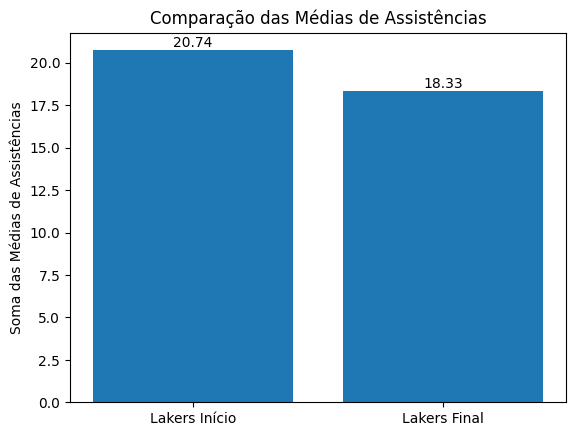

In [169]:
# Plotando a comparação da média de assistências por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_ast_inicio, soma_media_ast_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Soma das Médias de Assistências')
ax = plt.title('Comparação das Médias de Assistências')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

### Média de rebotes por jogo

In [100]:
# Criando um rank de media de rebotes com o elenco do início da temporada
media_reb_lakers_inicio = calcular_media_rebotes(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_reb_lakers_inicio.head()

,JOGADOR,MEDIA_REB,MEDIA_OREB,MEDIA_DREB,REB_OFENSIVOS %,REB_DEFENSIVOS %,RANK
0,Anthony Davis,12.54,3.48,9.05,0.28,0.72,1
1,LeBron James,8.31,1.18,7.13,0.14,0.86,2
2,Russell Westbrook,6.17,1.13,5.04,0.18,0.82,3
3,Wenyen Gabriel,4.21,1.71,2.50,0.41,0.59,4
4,Patrick Beverley,3.11,0.53,2.58,0.17,0.83,5


In [101]:
# Criando um rank de media de rebotes com o elenco do final da temporada
media_reb_lakers_final = calcular_media_rebotes(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_reb_lakers_final.head()

,JOGADOR,MEDIA_REB,MEDIA_OREB,MEDIA_DREB,REB_OFENSIVOS %,REB_DEFENSIVOS %,RANK
0,Anthony Davis,12.54,3.48,9.05,0.28,0.72,1
1,LeBron James,8.31,1.18,7.13,0.14,0.86,2
2,Jarred Vanderbilt,6.65,1.88,4.77,0.28,0.72,3
3,Rui Hachimura,4.70,1.03,3.67,0.22,0.78,4
4,Mo Bamba,4.56,1.22,3.33,0.27,0.73,5


In [102]:
# Soma das médias de rebotes dos jogadores de cada lista

# Total de rebotes
soma_media_reb_inicio = media_reb_lakers_inicio['MEDIA_REB'].sum().round(2)
soma_media_reb_final = media_reb_lakers_final['MEDIA_REB'].sum().round(2)

# Rebotes ofensivos
soma_media_oreb_inicio = media_reb_lakers_inicio['MEDIA_OREB'].sum().round(2)
soma_media_oreb_final = media_reb_lakers_final['MEDIA_OREB'].sum().round(2)

# Rebotes defensivos
soma_media_dreb_inicio = media_reb_lakers_inicio['MEDIA_DREB'].sum().round(2)
soma_media_dreb_final = media_reb_lakers_final['MEDIA_DREB'].sum().round(2)

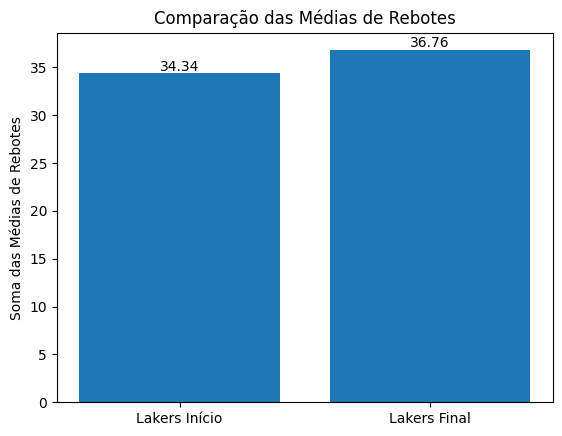

In [168]:
# Plotando a comparação da média de rebotes por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_reb_inicio, soma_media_reb_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Soma das Médias de Rebotes')
ax = plt.title('Comparação das Médias de Rebotes')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

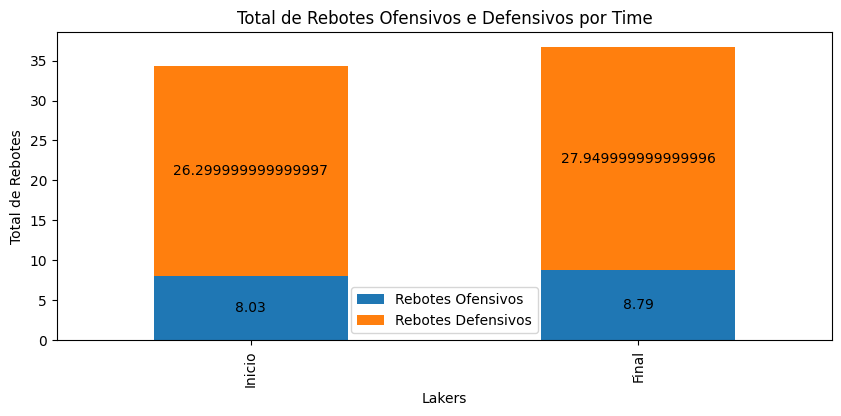

In [104]:
# Criar DataFrame com os totais de rebotes
df_totais_rebotes = pd.DataFrame({
    'Lakers': ['Inicio', 'Final'],
    'Rebotes Ofensivos': [soma_media_oreb_inicio, soma_media_oreb_final],
    'Rebotes Defensivos': [soma_media_dreb_inicio, soma_media_dreb_final],
}).round(2)


# Plotar o gráfico com rebotes ofensivos e defensivos por time
ax = df_totais_rebotes.plot(x='Lakers', kind='bar', stacked=True, figsize=(10, 4))
ax.set_xlabel('Lakers')
ax.set_ylabel('Total de Rebotes')
ax.set_title('Total de Rebotes Ofensivos e Defensivos por Time')
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height/2), ha='center', va='center')
plt.show()


### Média de Lances Livres por jogo

In [119]:
# Criando um rank de media de lances livres com o elenco do inicio da temporada
media_lances_livres_lakers_inicio = calcular_media_lances_livres(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_lances_livres_lakers_inicio.head()

,JOGADOR,MEDIA_FTA,MEDIA_FTM,% ACERTOS,RANK
0,Anthony Davis,7.93,6.21,0.78,1
1,LeBron James,5.95,4.56,0.77,2
2,Russell Westbrook,4.58,3.00,0.66,3
3,Lonnie Walker IV,1.89,1.62,0.86,4
4,Patrick Beverley,1.11,0.87,0.78,5


In [120]:
# Criando um rank de media de lances livres com o elenco do final da temporada
media_lances_livres_lakers_final = calcular_media_lances_livres(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_lances_livres_lakers_final.head()

,JOGADOR,MEDIA_FTA,MEDIA_FTM,% ACERTOS,RANK
0,Anthony Davis,7.93,6.21,0.78,1
1,LeBron James,5.95,4.56,0.77,2
2,D'Angelo Russell,2.88,2.12,0.74,3
3,Lonnie Walker IV,1.89,1.62,0.86,4
4,Rui Hachimura,1.85,1.33,0.72,5


In [126]:
# Soma das médias de lances livres tentados dos jogadores de cada lista
soma_media_lances_livres_lakers_inicio = media_lances_livres_lakers_inicio['MEDIA_FTA'].sum().round(2)
soma_media_lances_livres_lakers_final = media_lances_livres_lakers_final['MEDIA_FTA'].sum().round(2)

# Soma das médias de lances livres convertidos dos jogadores de cada lista
soma_media_lances_livres_convertidos_lakers_inicio = media_lances_livres_lakers_inicio['MEDIA_FTM'].sum().round(2)
soma_media_lances_livres_convertidos_lakers_final = media_lances_livres_lakers_final['MEDIA_FTM'].sum().round(2)

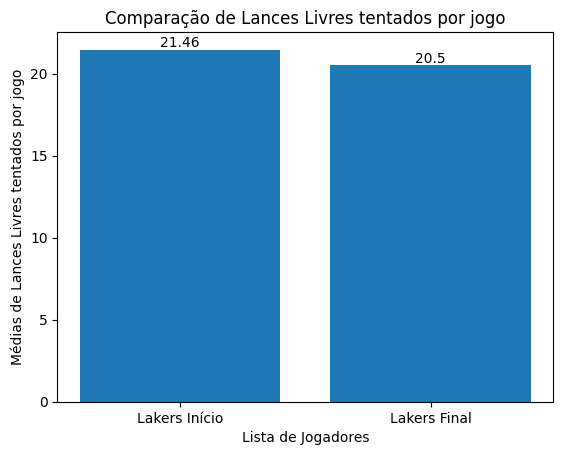

In [131]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_lances_livres_lakers_inicio,soma_media_lances_livres_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.xlabel('Lista de Jogadores')
ax = plt.ylabel('Médias de Lances Livres tentados por jogo')
ax = plt.title('Comparação de Lances Livres tentados por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

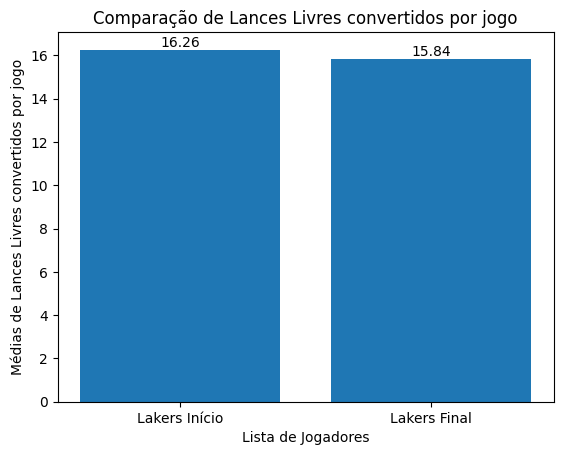

In [132]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_lances_livres_convertidos_lakers_inicio,soma_media_lances_livres_convertidos_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.xlabel('Lista de Jogadores')
ax = plt.ylabel('Médias de Lances Livres convertidos por jogo')
ax = plt.title('Comparação de Lances Livres convertidos por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

### Média de arremessos de quadra por jogo

In [128]:
# Criando um rank de media de arremessos de quadra com o elenco do inicio da temporada
media_arremessos_lakers_inicio = calcular_media_arremessos(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_arremessos_lakers_inicio.head()

,JOGADOR,MEDIA_FGA,MEDIA_FGM,% ACERTOS,RANK
0,LeBron James,22.16,11.07,0.50,1
1,Anthony Davis,17.18,9.68,0.56,2
2,Russell Westbrook,14.02,5.85,0.42,3
3,Lonnie Walker IV,9.41,4.21,0.45,4
4,Wenyen Gabriel,3.82,2.28,0.60,5


In [129]:
# Criando um rank de media de arremessos de quadra com o elenco do inicio da temporada
media_arremessos_lakers_final = calcular_media_arremessos(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_arremessos_lakers_final.head()

,JOGADOR,MEDIA_FGA,MEDIA_FGM,% ACERTOS,RANK
0,LeBron James,22.16,11.07,0.50,1
1,Anthony Davis,17.18,9.68,0.56,2
2,D'Angelo Russell,13.00,6.29,0.48,3
3,Lonnie Walker IV,9.41,4.21,0.45,4
4,Malik Beasley,10.31,4.04,0.39,5


In [130]:
# Soma das médias de arremessos de quadra tentados dos jogadores de cada lista
soma_media_arremessos_lakers_inicio = media_arremessos_lakers_inicio['MEDIA_FGA'].sum().round(2)
soma_media_arremessos_lakers_final = media_arremessos_lakers_final['MEDIA_FGA'].sum().round(2)

# Soma das médias de arremessos de quadra convertidos dos jogadores de cada lista
soma_media_arremessos_convertidos_lakers_inicio = media_arremessos_lakers_inicio['MEDIA_FGM'].sum().round(2)
soma_media_arremessos_convertidos_lakers_final = media_arremessos_lakers_final['MEDIA_FGM'].sum().round(2)

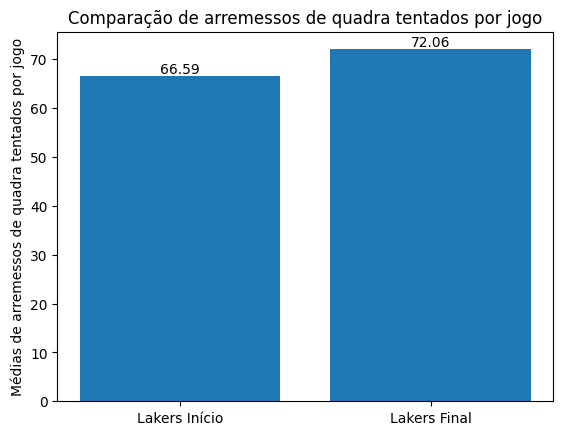

In [134]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_arremessos_lakers_inicio,soma_media_arremessos_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Médias de arremessos de quadra tentados por jogo')
ax = plt.title('Comparação de arremessos de quadra tentados por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

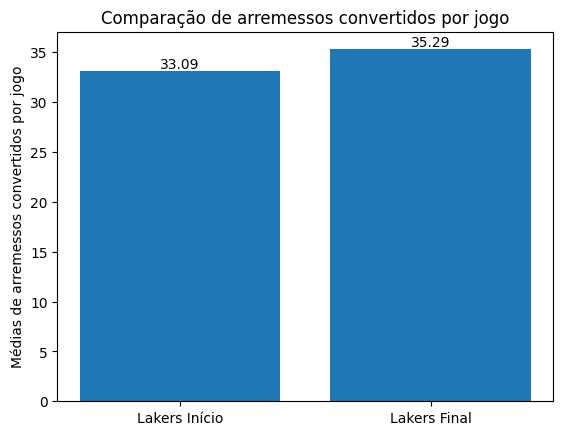

In [135]:
ccccccccccccccccc

### Média de arremessos de 3 pontos por jogo

In [138]:
# Criando um rank de media de arremessos de 3 pontos com o elenco do inicio da temporada
media_arremessos_3pts_lakers_inicio = calcular_media_arremessos_3pts(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_arremessos_3pts_lakers_inicio.head()

,JOGADOR,MEDIA_FG3A,MEDIA_FG3M,% ACERTOS,RANK
0,LeBron James,6.85,2.20,0.32,1
1,Lonnie Walker IV,4.45,1.62,0.36,2
2,Patrick Beverley,3.51,1.22,0.35,3
3,Russell Westbrook,4.10,1.21,0.30,4
4,Matt Ryan,2.92,1.08,0.37,5


In [139]:
# Criando um rank de media de arremessos de 3 pontos com o elenco do final da temporada
media_arremessos_3pts_lakers_final = calcular_media_arremessos_3pts(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_arremessos_3pts_lakers_final.head()

,JOGADOR,MEDIA_FG3A,MEDIA_FG3M,% ACERTOS,RANK
0,D'Angelo Russell,6.53,2.71,0.42,1
1,Malik Beasley,7.19,2.54,0.35,2
2,LeBron James,6.85,2.20,0.32,3
3,Lonnie Walker IV,4.45,1.62,0.36,4
4,Rui Hachimura,2.15,0.64,0.30,5


In [140]:
# Soma das médias de arremessos de 3 pontos tentados dos jogadores de cada lista
soma_media_arremessos_3pts_lakers_inicio = media_arremessos_3pts_lakers_inicio['MEDIA_FG3A'].sum().round(2)
soma_media_arremessos_3pts_lakers_final = media_arremessos_3pts_lakers_final['MEDIA_FG3A'].sum().round(2)

# Soma das médias de arremessos de 3 pontos convertidos dos jogadores de cada lista
soma_media_arremessos_3pts_convertidos_lakers_inicio = media_arremessos_3pts_lakers_inicio['MEDIA_FG3M'].sum().round(2)
soma_media_arremessos_3pts_convertidos_lakers_final = media_arremessos_3pts_lakers_final['MEDIA_FG3M'].sum().round(2)

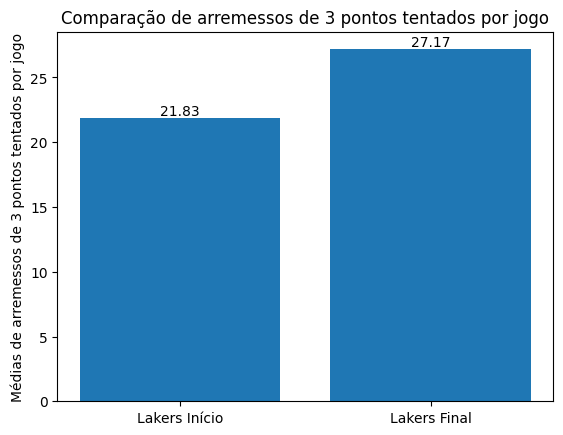

In [141]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_arremessos_3pts_lakers_inicio,soma_media_arremessos_3pts_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Médias de arremessos de 3 pontos tentados por jogo')
ax = plt.title('Comparação de arremessos de 3 pontos tentados por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

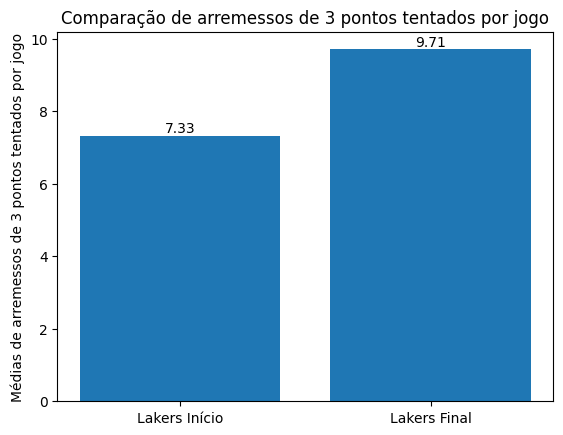

In [142]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_arremessos_3pts_convertidos_lakers_inicio,soma_media_arremessos_3pts_convertidos_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Médias de arremessos de 3 pontos tentados por jogo')
ax = plt.title('Comparação de arremessos de 3 pontos tentados por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

### Média de roubos de bola por jogo

In [144]:
# Criando um rank de media de roubos de bola com o elenco do inicio da temporada
media_roubos_lakers_inicio = calcular_media_roubos(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_roubos_lakers_inicio.head()

,JOGADOR,MEDIA_STL,RANK
0,Anthony Davis,1.05,1
1,Russell Westbrook,1.02,2
2,LeBron James,0.91,3
3,Patrick Beverley,0.89,4
4,Lonnie Walker IV,0.54,5


In [145]:
# Criando um rank de media de roubos de bola com o elenco do final da temporada
media_roubos_lakers_final = calcular_media_roubos(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_roubos_lakers_final.head()

,JOGADOR,MEDIA_STL,RANK
0,Jarred Vanderbilt,1.15,1
1,Anthony Davis,1.05,2
2,LeBron James,0.91,3
3,Malik Beasley,0.81,4
4,D'Angelo Russell,0.59,5


In [146]:
# Soma das médias de roubos de bola dos jogadores de cada lista
soma_media_roubos_lakers_inicio = media_roubos_lakers_inicio['MEDIA_STL'].sum().round(2)
soma_media_roubos_lakers_final = media_roubos_lakers_final['MEDIA_STL'].sum().round(2)

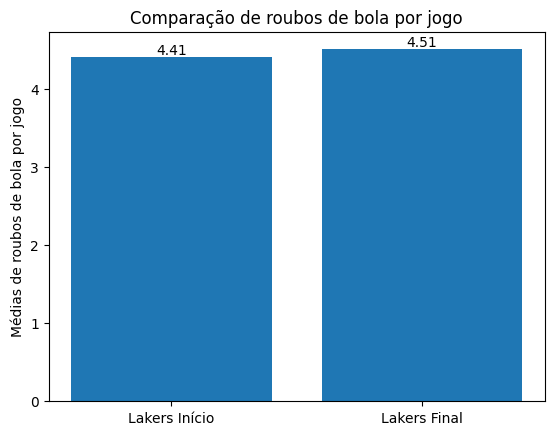

In [147]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_roubos_lakers_inicio,soma_media_roubos_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Médias de roubos de bola por jogo')
ax = plt.title('Comparação de roubos de bola por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

### Média de erros de posse por jogo

In [150]:
# Criando um rank de media de perdas de bola com o elenco do inicio da temporada
media_turnover_lakers_inicio = calcular_media_perda(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_turnover_lakers_inicio.head()

,JOGADOR,MEDIA_TOV,RANK
0,Russell Westbrook,3.54,1
1,LeBron James,3.24,2
2,Anthony Davis,2.18,3
3,Patrick Beverley,0.93,4
4,Lonnie Walker IV,0.82,5


In [151]:
# Criando um rank de media de perdas de bola com o elenco do final da temporada
media_turnover_lakers_final = calcular_media_perda(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_turnover_lakers_final.head()

,JOGADOR,MEDIA_TOV,RANK
0,LeBron James,3.24,1
1,D'Angelo Russell,2.29,2
2,Anthony Davis,2.18,3
3,Malik Beasley,1.15,4
4,Jarred Vanderbilt,1.12,5


In [152]:
# Soma das médias de roubos de bola dos jogadores de cada lista
soma_media_turnover_lakers_inicio = media_turnover_lakers_inicio['MEDIA_TOV'].sum().round(2)
soma_media_turnover_lakers_final = media_turnover_lakers_final['MEDIA_TOV'].sum().round(2)

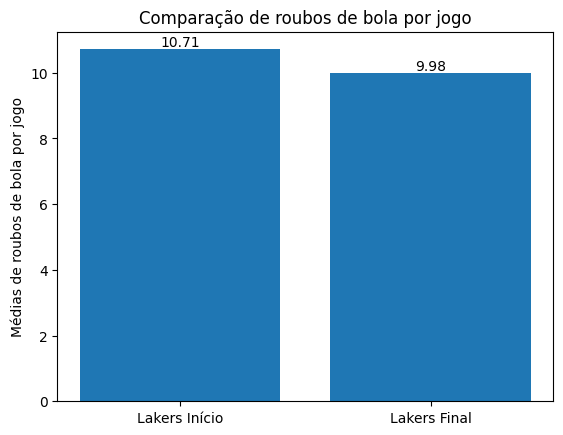

In [153]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_turnover_lakers_inicio,soma_media_turnover_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Médias de roubos de bola por jogo')
ax = plt.title('Comparação de roubos de bola por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

### Média de tocos por jogo

In [154]:
# Criando um rank de media de tocos com o elenco do inicio da temporada
media_tocos_lakers_inicio = calcular_media_tocos(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_tocos_lakers_inicio.head()

,JOGADOR,MEDIA_BLK,RANK
0,Anthony Davis,2.04,1
1,LeBron James,0.58,2
2,Patrick Beverley,0.56,3
3,Wenyen Gabriel,0.51,4
4,Russell Westbrook,0.44,5


In [157]:
# Criando um rank de media de tocos com o elenco do final da temporada
media_tocos_lakers_final = calcular_media_tocos(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_tocos_lakers_final.head()

,JOGADOR,MEDIA_BLK,RANK
0,Anthony Davis,2.04,1
1,LeBron James,0.58,2
2,Mo Bamba,0.56,3
3,Wenyen Gabriel,0.51,4
4,D'Angelo Russell,0.47,5


In [158]:
# Soma das médias de roubos de bola dos jogadores de cada lista
soma_media_tocos_lakers_inicio = media_tocos_lakers_inicio['MEDIA_BLK'].sum().round(2)
soma_media_tocos_lakers_final = media_tocos_lakers_final['MEDIA_BLK'].sum().round(2)

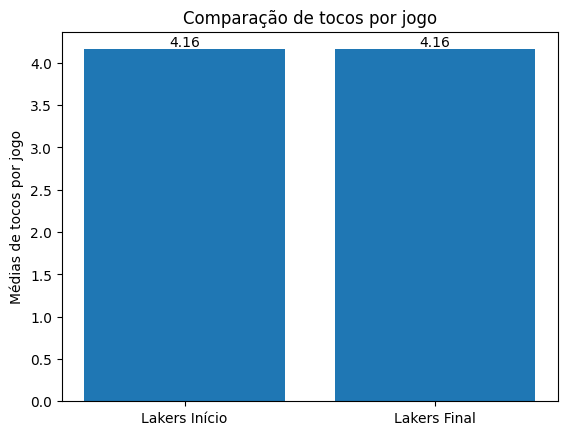

In [160]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_tocos_lakers_inicio,soma_media_tocos_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Médias de tocos por jogo')
ax = plt.title('Comparação de tocos por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()

### Média de faltas pessoais por jogo

In [164]:
# Criando um rank de media de faltas cometidas com o elenco do inicio da temporada
media_faltas_lakers_inicio = calcular_media_faltas(elenco_lakers.query('JOGADOR in @lista_lakers_inicio'))
media_faltas_lakers_inicio.head()

,JOGADOR,MEDIA_PF,RANK
0,Patrick Beverley,2.76,1
1,Anthony Davis,2.61,2
2,Russell Westbrook,2.33,3
3,Wenyen Gabriel,2.12,4
4,LeBron James,1.60,5


In [165]:
# Criando um rank de media de faltas cometidas com o elenco do final da temporada
media_faltas_lakers_final = calcular_media_faltas(elenco_lakers.query('JOGADOR in @lista_lakers_final'))
media_faltas_lakers_final.head()

,JOGADOR,MEDIA_PF,RANK
0,Anthony Davis,2.61,1
1,Jarred Vanderbilt,2.19,2
2,Wenyen Gabriel,2.12,3
3,Mo Bamba,2.11,4
4,LeBron James,1.60,5


In [166]:
# Soma das médias de faltas cometidas dos jogadores de cada lista
soma_media_faltas_lakers_inicio = media_faltas_lakers_inicio['MEDIA_PF'].sum().round(2)
soma_media_faltas_lakers_final = media_faltas_lakers_final['MEDIA_PF'].sum().round(2)

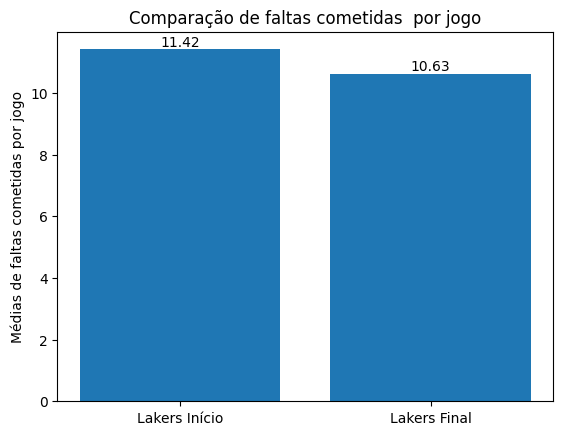

In [167]:
# Plotando a comparação da média de lances livres tentados por jogo
labels = ['Lakers Início', 'Lakers Final']
somas = [soma_media_faltas_lakers_inicio,soma_media_faltas_lakers_final]

ax = plt.bar(labels, somas)
ax = plt.ylabel('Médias de faltas cometidas por jogo')
ax = plt.title('Comparação de faltas cometidas  por jogo')
for i in range(len(labels)):
    plt.text(i, somas[i], str(somas[i]), ha='center', va='bottom')
ax = plt.show()